# **Análise de Dados - Loterias Caixa**
<img src='http://loterias.caixa.gov.br/wps/wcm/connect/c5bcb530-8654-4e71-a4bc-6bb16b96b56e/02_Quina.png?MOD=AJPERES&CACHEID=c5bcb530-8654-4e71-a4bc-6bb16b96b56e' width=200>

> ## **Download do arquivo (url) com os resultados:**
---

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

url = 'http://loterias.caixa.gov.br/wps/portal/loterias/landing/quina/!ut/p/a1/jc69DoIwAATgZ_EJepS2wFgoaUswsojYxXQyTfgbjM9vNS4Oordd8l1yxJGBuNnfw9XfwjL78dmduIikhYFGA0tzSFZ3tG_6FCmP4BxBpaVhWQuA5RRWlUZlxR6w4r89vkTi1_5E3CfRXcUhD6osEAHA32Dr4gtsfFin44Bgdw9WWSwj/dl5/d5/L2dBISEvZ0FBIS9nQSEh/pw/Z7_HGK818G0K85260Q5OIRSC420O4/res/id=historicoHTML/c=cacheLevelPage/=/'
dados = requests.get(url) # efetua a leitura do arquivo de dados através da url

> ## **Leitura do arquivo HTML (Pandas DataFrame) e identificação das colunas da tabela:**
---

In [6]:
dflis = pd.read_html(dados.text, thousands='.', decimal=',') # leitura do arquivo HTML > lista de DataFrames
df = dflis[0] # a 1ª posição da lista contém a tabela com os dados dos sorteios já realizados
df.columns

Index(['Concurso', 'Data Sorteio', '1ª Dezena', '2ª Dezena', '3ª Dezena',
       '4ª Dezena', '5ª Dezena', 'Arrecadacao_Total', 'Ganhadores_Quina',
       'Cidade', 'Rateio_Quina', 'Ganhadores_Quadra', 'Rateio_Quadra',
       'Ganhadores_Terno', 'Rateio_Terno', 'Ganhadores_Duque', 'Rateio_Duque',
       'Acumulado', 'Valor_Acumulado', 'Estimativa_Premio',
       'Valor_Acumulado_Sorteio_Especial_São_João'],
      dtype='object')

> ## **Mostra os 5 primeiros e os 5 últimos sorteios da tabela:**
---

In [7]:
df # df.head(10) e df.tail(10) mostram 10 linhas do início e do fim, respectivamente.

,Concurso,Data Sorteio,1ª Dezena,2ª Dezena,3ª Dezena,4ª Dezena,5ª Dezena,Arrecadacao_Total,Ganhadores_Quina,Cidade,Rateio_Quina,Ganhadores_Quadra,Rateio_Quadra,Ganhadores_Terno,Rateio_Terno,Ganhadores_Duque,Rateio_Duque,Acumulado,Valor_Acumulado,Estimativa_Premio,Valor_Acumulado_Sorteio_Especial_São_João
0,1,13/03/1994,25,45,60,76,79,0.0,3,NaN,7.573122e+07,127,1788927.00,7030,42982.00,0,0.00,NAO,0.00,0.00,0.00
1,2,17/03/1994,13,30,58,63,64,0.0,1,NaN,1.184994e+08,105,1128565.00,4861,32422.00,0,0.00,NAO,0.00,0.00,0.00
2,3,20/03/1994,5,15,32,33,48,0.0,1,NaN,1.542443e+08,232,664846.00,10196,20120.00,0,0.00,NAO,0.00,0.00,0.00
3,4,24/03/1994,27,57,60,61,77,0.0,1,NaN,1.241852e+08,78,1592119.00,4033,40954.00,0,0.00,NAO,0.00,0.00,0.00
4,5,27/03/1994,19,44,53,54,71,0.0,1,NaN,1.475957e+08,137,1077341.00,5338,36774.00,0,0.00,NAO,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5767,5768,31/01/2022,9,15,66,71,78,12461360.0,0,NaN,0.000000e+00,109,5203.76,7053,76.59,166406,3.24,SIM,8151479.14,8151479.14,83779004.09
5768,5769,01/02/2022,15,16,20,31,55,14400518.0,0,NaN,0.000000e+00,97,6757.48,8420,74.14,203638,3.06,SIM,9680922.15,9680922.15,84434479.68
5769,5770,02/02/2022,26,27,29,40,76,15071356.0,1,RIO DE JANEIRO RJ,1.128161e+07,120,5716.76,7349,88.90,186799,3.49,NAO,0.00,0.00,85120490.14
5770,5771,03/02/2022,6,12,24,32,69,6428400.0,0,NaN,0.000000e+00,56,5225.08,4873,57.18,104745,2.66,SIM,682744.30,682744.30,85413094.83


> ## **Seleção das colunas com as dezenas sorteadas de cada concurso.**
+ ## Cálculo da qtde de vezes que cada dezena foi sorteada.
+ ## Cálculo das dezenas menos e mais sorteadas.
> #### Obs.: na primeira linha, df.iloc[:, 2:7] também pode ser usado para selecionar as colunas das dezenas sorteadas.



In [ ]:
npdez_sort = df.loc[:, '1ª Dezena':'5ª Dezena'].to_numpy() # converte as colunas das dezenas sorteadas em um array numpy
npqtde_sort = np.array([[n, (npdez_sort == n).sum()] for n in range(1, 81)]) # array com números e qtdes sorteadas (ou np.count_nonzero(npdez_sort == n))

mi, ma = min(npqtde_sort[:, 1]), max(npqtde_sort[:, 1]) # calcula a qtde mínima e máxima sorteadas.
lis_mi = npqtde_sort[:, 0][(npqtde_sort[:, 1] == mi)] # lista com os números que têm a mesma qtde mínima sorteada.
lis_ma = npqtde_sort[:, 0][(npqtde_sort[:, 1] == ma)] # o mesmo para a qtde máxima.
print(npqtde_sort)
print(f'\nMínimo = {mi} {lis_mi}\nMáximo = {ma} {lis_ma}')

[[  1 341]
 [  2 354]
 [  3 316]
 [  4 411]
 [  5 379]
 [  6 359]
 [  7 348]
 [  8 356]
 [  9 373]
 [ 10 386]
 [ 11 350]
 [ 12 362]
 [ 13 374]
 [ 14 359]
 [ 15 386]
 [ 16 384]
 [ 17 335]
 [ 18 384]
 [ 19 365]
 [ 20 330]
 [ 21 341]
 [ 22 343]
 [ 23 343]
 [ 24 333]
 [ 25 332]
 [ 26 381]
 [ 27 347]
 [ 28 364]
 [ 29 383]
 [ 30 331]
 [ 31 396]
 [ 32 345]
 [ 33 380]
 [ 34 357]
 [ 35 339]
 [ 36 357]
 [ 37 374]
 [ 38 377]
 [ 39 390]
 [ 40 370]
 [ 41 359]
 [ 42 378]
 [ 43 356]
 [ 44 388]
 [ 45 367]
 [ 46 357]
 [ 47 316]
 [ 48 325]
 [ 49 400]
 [ 50 346]
 [ 51 350]
 [ 52 395]
 [ 53 393]
 [ 54 369]
 [ 55 355]
 [ 56 377]
 [ 57 332]
 [ 58 332]
 [ 59 355]
 [ 60 348]
 [ 61 379]
 [ 62 345]
 [ 63 351]
 [ 64 367]
 [ 65 336]
 [ 66 373]
 [ 67 341]
 [ 68 334]
 [ 69 350]
 [ 70 372]
 [ 71 359]
 [ 72 378]
 [ 73 380]
 [ 74 366]
 [ 75 364]
 [ 76 357]
 [ 77 357]
 [ 78 354]
 [ 79 365]
 [ 80 359]]

Mínimo = 316 [ 3 47]
Máximo = 411 [4]


> ## **Gráfico (barras) com as quantidades sorteadas de cada dezena (ordem crescente).**
+ ## Destaque para as 15 dezenas mais sorteadas:

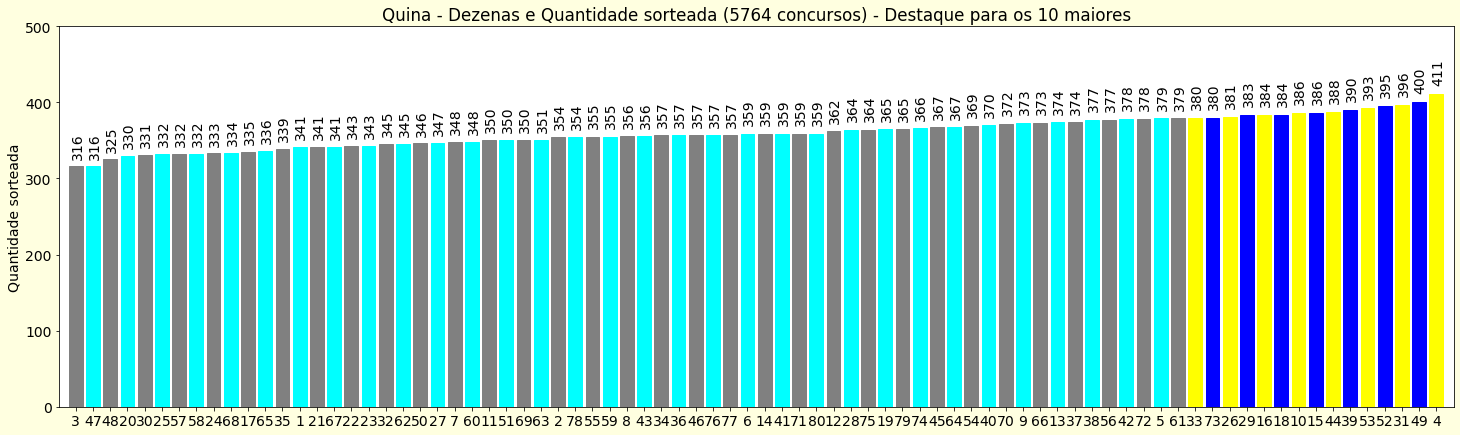

In [ ]:
npqtde_sort_ord = np.array(sorted(npqtde_sort, key=lambda col: col[1])) # ordena os números de acordo com a qtde de sorteios

plt.rcParams['figure.figsize'] = (25, 7) # tamanho da imagem
plt.rcParams['figure.facecolor'] = 'lightyellow'
plt.rcParams['font.size'] = 14 # tamanho da fonte dos textos
plt.axis([0, 81, 0, 500]) # intervalo dos eixos x e y

# gráfico de barras horiz. X e Y são listas
barras = plt.bar(range(1, 81), npqtde_sort_ord[:, 1], tick_label=npqtde_sort_ord[:, 0])

plt.title(f'Quina - Dezenas e Quantidade sorteada ({df.shape[0]} concursos) - Destaque para os 10 maiores') # shape contém qtde de linhas e colunas (tuple)
plt.ylabel('Quantidade sorteada')
for i in range(80):
    cor1, cor2 = 'gray', 'cyan'
    if i > 64: # cor diferente para os 15 valores com mais frequência nos sorteios
        cor1, cor2 = 'blue', 'yellow'
    barras[i].set_color(cor1 if i % 2 == 0 else cor2)
for i, bar in enumerate(barras):
    plt.text(bar.get_x() + 0.5, 1.03 * bar.get_height(), npqtde_sort_ord[i, 1],
             ha='center', va='bottom', rotation=90)
plt.show()

> ## **Gráfico (torta) dos 15 primeiros estados (UF) com maiores quantidades e porcentagens de prêmios distribuídos:**
---

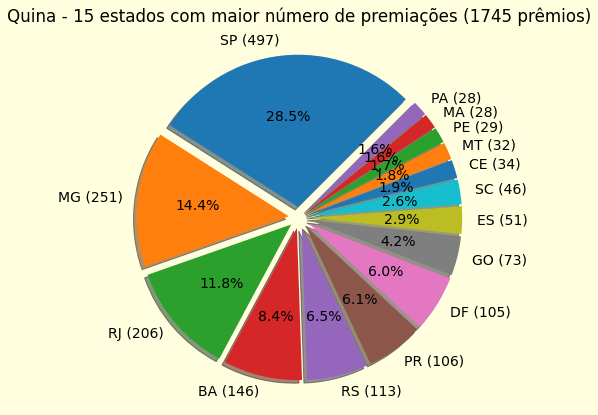

In [ ]:
dfuf = pd.DataFrame([str(uf)[-2:] for uf in df.Cidade if str(uf) != 'nan']) # seleciona a UF e ignora os valores 'nan' (not a number)
vcuf = dfuf.value_counts()[:15]
plt.title(f'Quina - 15 estados com maior número de premiações ({sum(vcuf)} prêmios)') 
plt.rcParams['figure.figsize'] = (12, 12) # tamanho da imagem
plt.rcParams['figure.facecolor'] = 'lightyellow'
plt.rcParams['font.size'] = 14 # tamanho da fonte dos textos
plt.pie(vcuf, [0.07] * len(vcuf), [vcuf.index[i][0] + ' (' + str(val) + ')' for i, val in enumerate(vcuf)], 
        autopct='%.1f%%', shadow=True, startangle=45)
plt.show()